In [1]:
from dqnotebook import QuadraticDrawer

In [2]:
%matplotlib notebook

In [3]:
from cmath import rect, pi, sqrt

In [4]:
from obj import QuadraticDifferential
import matplotlib as mpl
#mpl.use("pgf")
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [5]:
def hacer_reticula(quad, punto, paso, longitud):
    t1 = quad.compute_trajectory(punto)
    quad.phase = quad.phase*complex(-1,0)
    t2 = quad.compute_trajectory(punto)
    coord1=t1.coordinates.tolist()
    coord2=t2.coordinates.tolist()
    plots = []
    plots_ort = []
    recorrido = 0
    num_paso = 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1+1][0],coord1[start1+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 += 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2+1][0],coord2[start2+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 += 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1-1][0],coord1[start1-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 -= 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2-1][0],coord2[start2-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 -= 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    quad.plotpoints = quad.plotpoints + plots + plots_ort
        

<IPython.core.display.Javascript object>


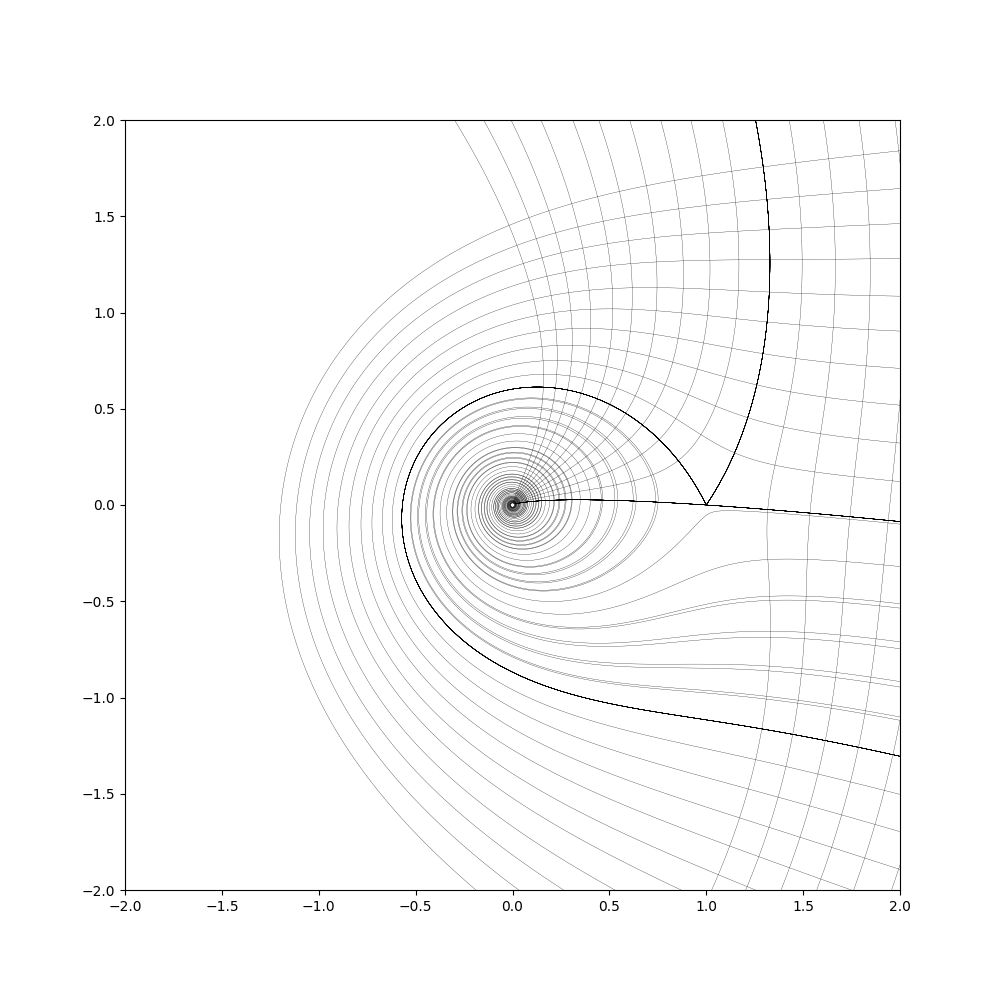

..........................................
........................................


In [8]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.phase=rect(1,0.2)
quad9.zeros=[complex(1,0) ]
quad9.dblpoles = [complex(0,0)]
hacer_reticula(quad9, complex(1,0.0001), 0.1, 1.0)
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9.draw_trajectories()
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9_ort.draw_trajectories()
limite= 2.0
quad_drawer9.ax.set_ylim(-1*limite,limite)
quad_drawer9.ax.set_xlim(-1*limite,limite)
fig9.set_size_inches(10,10)